In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import train csv
df = pd.read_csv('train.csv')

#check dataframe columns
print(f"[INFO] columns: {df.columns}")

[INFO] columns: Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [3]:
#set ID as index
df = df.set_index('ID')
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
features = df.drop(columns='medv',axis=1)
# features.columns
cols = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
target = df['medv']
print("[INFO] features shape : {}".format(features.shape))
print("[INFO] target shape   : {}".format(target.shape))

[INFO] features shape : (333, 13)
[INFO] target shape   : (333,)


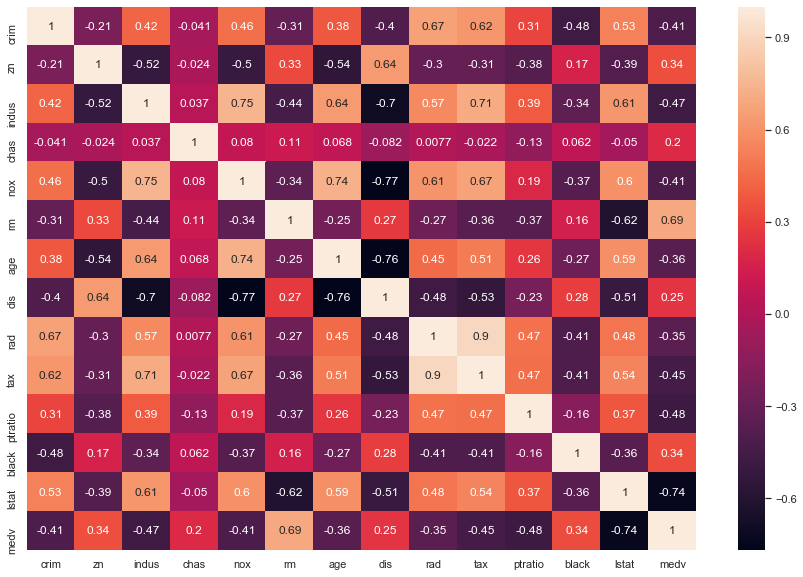

In [8]:
#Check Correlation
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(method='pearson'),annot=True)

In [11]:
X = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
Y = df['medv']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]

    model.fit(X,Y)
    y_train_predict = model.predict(X)
    results = (np.sqrt(mean_squared_error(Y, y_train_predict)))
    
    model_results.append(results)
    model_names.append(model_name)

for i,result in enumerate(model_results):
    print(f"The model performance for {model_names[i]}")
    print(f'RMSE is {round(result,4)}')
    print("--------------------------------------")
    

The model performance for Linear
RMSE is 4.7318
--------------------------------------
The model performance for Lasso
RMSE is 5.2619
--------------------------------------
The model performance for ElasticNet
RMSE is 5.2098
--------------------------------------
The model performance for KNN
RMSE is 5.1653
--------------------------------------
The model performance for DecisionTree
RMSE is 0.0
--------------------------------------
The model performance for SVR
RMSE is 8.4659
--------------------------------------
The model performance for AdaBoost
RMSE is 2.6431
--------------------------------------
The model performance for GradientBoost
RMSE is 1.1397
--------------------------------------
The model performance for RandomForest
RMSE is 1.4314
--------------------------------------
The model performance for ExtraTrees
RMSE is 0.0
--------------------------------------


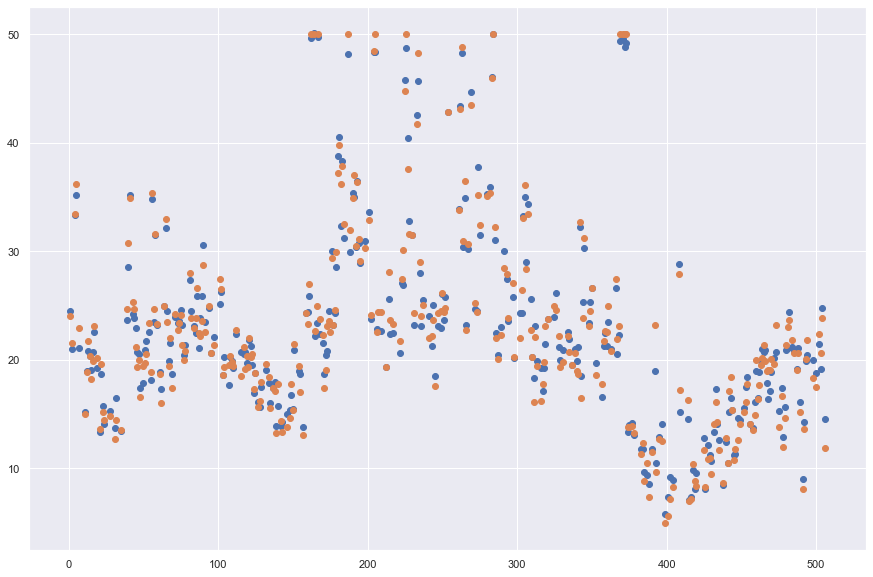

In [53]:
# create and fit the best regression model
best_model = GradientBoostingRegressor()
best_model.fit(X, Y)
linear_model = LinearRegression()
linear_model.fit(X,Y)

# make predictions using the model and compare it to original value
predictions = best_model.predict(X)
linreg_line = linear_model.predict(X)
plt.scatter(X.index, predictions)
plt.scatter(X.index, Y)
plt.show()

In [77]:
#export as csv
export_csv = submission.to_csv (r'X:\training\Boston Housing\submission.csv', index = None, header=True)

"""
File uploaded to kaggle competition https://www.kaggle.com/c/boston-housing/
with private score: 3.88925 and public score 3.74084 (RMSE)
"""